<a href="https://colab.research.google.com/github/Luganda1/Google-colab-/blob/main/Google_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

tesla_trends = pd.read_csv('TESLA Search Trend vs Price.csv')
bitcoin_trends = pd.read_csv('Bitcoin Search Trend.csv')
daily_bitcoin_search = pd.read_csv('Daily Bitcoin Price.csv')
unemployment_benefit_19 = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')
unemployment_benefit_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [2]:
tesla_trends.head()
bitcoin_trends.head()
daily_bitcoin_search.head()
unemployment_benefit_19.head()
unemployment_benefit_20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [3]:
tesla_trends.shape

(124, 3)

In [4]:
tesla_trends.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

The **describe()** method computes and displays summary statistics for a Python dataframe. (It also operates on dataframe columns and Pandas series objects.) So if you have a Pandas dataframe or a Series object, you can use the describe method and it will output statistics like: mean

In [5]:
tesla_trends.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [6]:
bitcoin_trends.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


The **count()** method in Python calculates how many times a particular value appears within a string or a list in Python. count() accepts one argument: the value for which you want to search in the string or list. When count() is used with a string, it will search for a substring within a larger string

In [25]:
unemployment_benefit_19.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


**std()**, used to compute the standard deviation along the specified axis. This function returns the standard deviation of the array elements. The square root of the average square deviation (computed from the mean), is known as the standard deviation.

In [24]:
unemployment_benefit_20.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200.000000,200.000000
mean,10.315000,6.173000
std,10.778061,2.128267
min,4.000000,3.500000
25%,5.000000,4.600000
50%,7.000000,5.400000
75%,12.000000,7.825000
max,100.000000,14.700000


In [23]:
daily_bitcoin_search.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


Challenge

Can you investigate all 4 DataFrames and find if there are any missing values? 

If yes, find how many missing or NaN values there are. Then, find the row where the missing values occur.

Finally, remove any rows that contain missing values. 

In [8]:
print(f'Missing values for Tesla?: {tesla_trends.isna().values.any()}')

Missing values for Tesla?: False


In [9]:
print(f"Missing value for BTC search?: {bitcoin_trends.isna().values.any()}")

Missing value for BTC search?: False


In [22]:
print(f'Missing values for Daily BTC prices?: {daily_bitcoin_search.isna().values.any()}')

Missing values for Daily BTC prices?: True


In [9]:
print(f'Number of missing values?: {daily_bitcoin_search.isna().values.sum()}')

Number of missing values?: 2


In [15]:
daily_bitcoin_search.dropna(inplace=True)

In [8]:
print(f'Missing values for Daily BTC prices?: {daily_bitcoin_search.isna().values.any()}')

Missing values for Daily BTC prices?: True


In [7]:
print(f'Missing values fr Unemployt: {unemployment_benefit_20.isna().values.any()}')

Missing values fr Unemployt: False


CONVETING DATA TO TIMESERIES

In [ ]:
type(bitcoin_trends.MONTH[1])

In [7]:
bitcoin_trends.MONTH = pd.to_datetime(bitcoin_trends.MONTH)

In [8]:
type(bitcoin_trends.MONTH[1])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
daily_bitcoin_search.DATE = pd.to_datetime(daily_bitcoin_search.DATE)

In [10]:
tesla_trends.MONTH = pd.to_datetime(tesla_trends.MONTH)

In [49]:
unemployment_benefit_20.MONTH = pd.to_datetime(unemployment_benefit_20.MONTH)
unemployment_benefit_19.MONTH = pd.to_datetime(unemployment_benefit_19.MONTH)

**RESAMPLING **
To convert our daily data into monthly data, we're going to use the .resample() function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example 'Y' for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.

    df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

If we wanted the average price over the course of the month, we could use something like:

    df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()


In [16]:
btc_montly = daily_bitcoin_search.resample('M', on='DATE').last()

In [11]:
btc_montly.shape

(73, 3)

In [17]:
btc_montly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [ ]:
print(btc_montly.DATE)

In [38]:
print(tesla_trends.MONTH.max())

2020-09-01


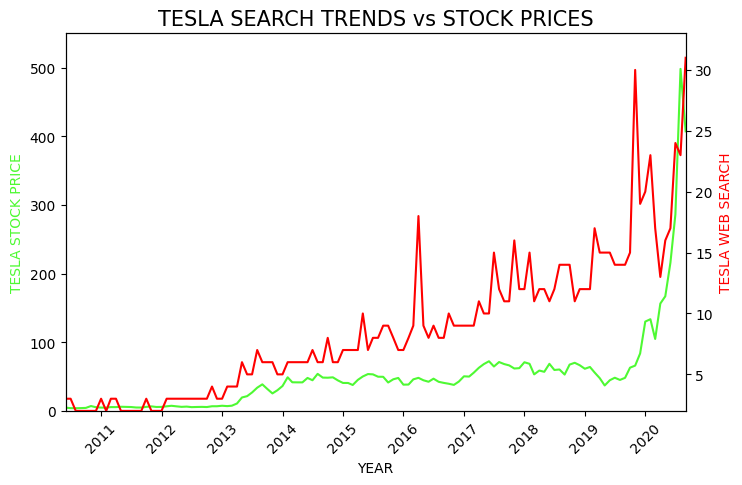

In [18]:
plt.figure(figsize=(8,5), dpi=100)
plt.title('TESLA SEARCH TRENDS vs STOCK PRICES', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel('YEAR', fontsize=10,)
ax1.set_ylabel('TESLA STOCK PRICE', fontsize=10, color='#4ef933')
ax2.set_ylabel('TESLA WEB SEARCH', fontsize=10, color='red')

# setting y-limits and x-limits
ax1.set_ylim(0, 550)
ax2.set_ylim(2, 33)
ax1.set_xlim(tesla_trends.MONTH.min(), tesla_trends.MONTH.max())

# Plotting the graph
ax1.plot(tesla_trends.MONTH, tesla_trends.TSLA_USD_CLOSE, color='#4ef933')
ax2.plot(tesla_trends.MONTH, tesla_trends.TSLA_WEB_SEARCH, 'r')

# Displays chart explicitly
plt.show()

Adding Locator Tick Marks

When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. This is why we have Locator helpers. 
The first step is importing matplotlib.dates.  This is where all the date plotting capabilities live. 
Next, we need a YearLocator() and a MonthLocator() objects, which will help Matplotlib find the years and the months. Then we also need a DateFormatter(), which will help us specify how we want to display the dates. 



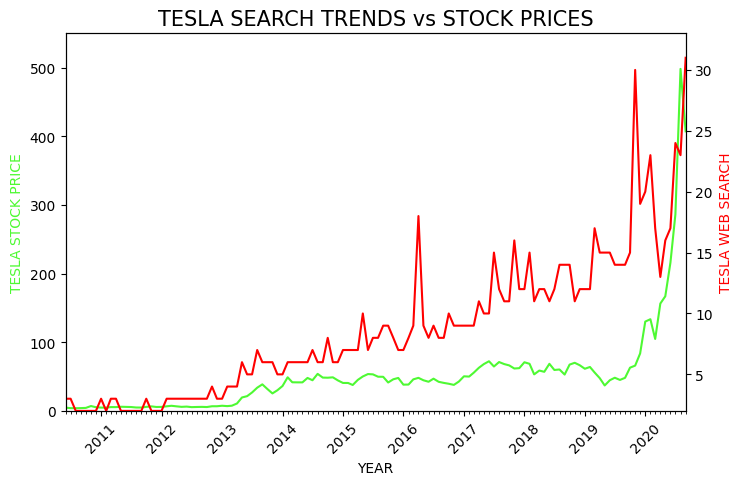

In [19]:
plt.figure(figsize=(8,5), dpi=100)
plt.title('TESLA SEARCH TRENDS vs STOCK PRICES', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# TICKS
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1 = plt.gca()
ax2 = ax1.twinx() 
# Settig up the ticks on the x-axis
ax1.set_xlabel('YEAR', fontsize=10,)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TESLA STOCK PRICE', fontsize=10, color='#4ef933')
ax2.set_ylabel('TESLA WEB SEARCH', fontsize=10, color='red')

# setting y-limits and x-limits
ax1.set_ylim(0, 550)
ax2.set_ylim(2, 33)
ax1.set_xlim(tesla_trends.MONTH.min(), tesla_trends.MONTH.max())

# Plotting the graph
ax1.plot(tesla_trends.MONTH, tesla_trends.TSLA_USD_CLOSE, color='#4ef933')
ax2.plot(tesla_trends.MONTH, tesla_trends.TSLA_WEB_SEARCH, 'r')

# Displays chart explicitly
plt.show()

  **BITCOIN NEWS SEARCH**

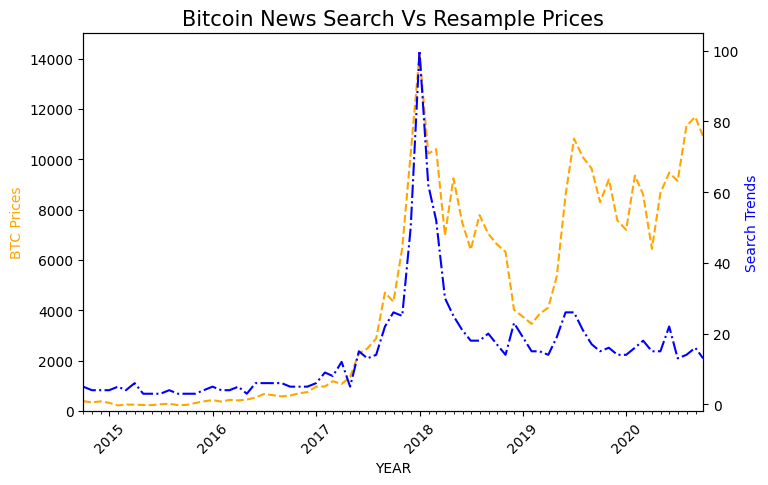

In [29]:
plt.figure(figsize=(8,5), dpi=100)
plt.title('Bitcoin News Search Vs Resample Prices', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# TICKS
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1 = plt.gca()
ax2 = ax1.twinx() 
# Settig up the ticks on the x-axis
ax1.set_xlabel('YEAR', fontsize=10,)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC Prices', fontsize=10, color='orange')
ax2.set_ylabel('Search Trends', fontsize=10, color='b')

# setting y-limits and x-limits
ax1.set_ylim(bottom=0, top=15000)
# ax2.set_ylim(2, 33)
ax1.set_xlim(btc_montly.DATE.min(), btc_montly.DATE.max())

# Plotting the graph
ax1.plot(btc_montly.DATE, btc_montly.CLOSE, color='orange', linestyle='dashed')
ax2.plot(btc_montly.DATE, bitcoin_trends.BTC_NEWS_SEARCH, 'b', linestyle='-.')

# Displays chart explicitly
plt.show()

**Chart Review**

---


What we see in the chart is that similar to Tesla, the crazy price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was). 

linestyle="dashed"
 try '--' or '-.' for the linestyle

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-09-23-859e1afde86b85212030553a87efb08f.png" />




**UNEMPLOYMENT RATE**

**UNEMPLOYMENT BENFITS Vs RATE 2020**

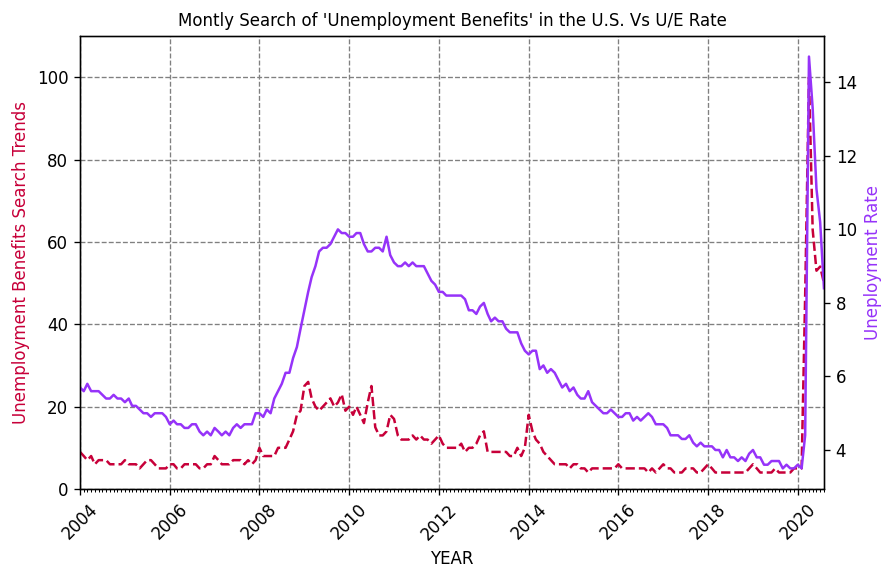

In [ ]:
plt.figure(figsize=(8,5), dpi=120)
plt.title("Montly Search of 'Unemployment Benefits' in the U.S. Vs U/E Rate", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)
# plt.grid(b=True, axis='both', which='major')
rolling_avg = unemployment_benefit_20.rolling(window=6).mean()

# TICKS
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1 = plt.gca()
ax2 = ax1.twinx() 
# Settig up the ticks on the x-axis
ax1.set_xlabel('YEAR', fontsize=10,)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Unemployment Benefits Search Trends', fontsize=10, color='#C70039')
ax2.set_ylabel('Uneployment Rate', fontsize=10, color='#9633f9')

# grid
ax1.grid(color='grey', linestyle='--')
# setting y-limits and x-limits

ax1.set_ylim(0, 110)
ax1.set_xlim(unemployment_benefit_20.MONTH.min(), unemployment_benefit_20.MONTH.max())

# Plotting the graph
ax1.plot(unemployment_benefit_20.MONTH, unemployment_benefit_20.UE_BENEFITS_WEB_SEARCH, color='#C70039', linestyle='--')
ax2.plot(unemployment_benefit_20.MONTH, unemployment_benefit_20.UNRATE, color='#9633f9', linestyle='-')

# Displays chart explicitly
plt.show()

What we see is not pretty. The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis. Let's hope the recovery will be swifter this time. 

**UNEMPLOYMENT BENFITS Vs RATE 2019**

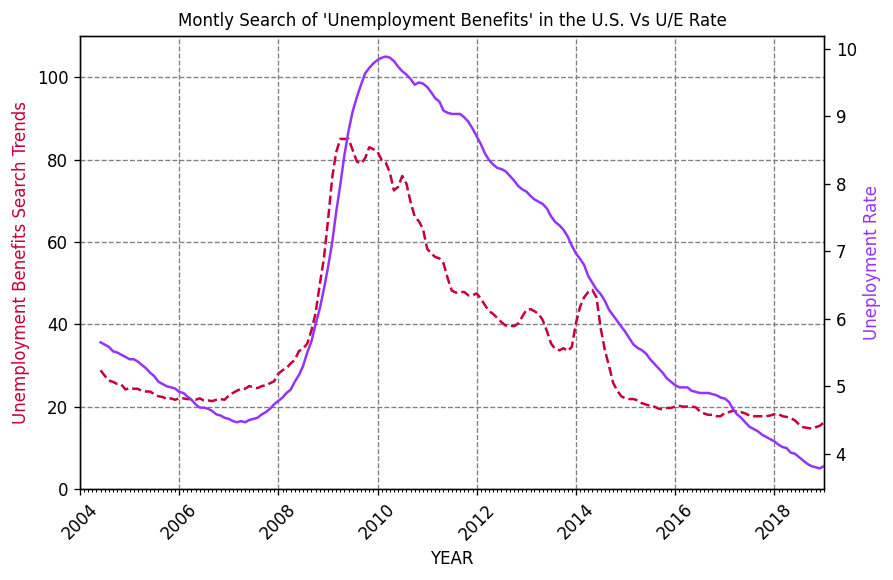

In [51]:
plt.figure(figsize=(8,5), dpi=120)
plt.title("Montly Search of 'Unemployment Benefits' in the U.S. Vs U/E Rate", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)
# plt.grid(b=True, axis='both', which='major')
rolling_avg = unemployment_benefit_19[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# TICKS
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1 = plt.gca()
ax2 = ax1.twinx() 
# Settig up the ticks on the x-axis
ax1.set_xlabel('YEAR', fontsize=10,)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Unemployment Benefits Search Trends', fontsize=10, color='#C70039')
ax2.set_ylabel('Uneployment Rate', fontsize=10, color='#9633f9')

# grid
ax1.grid(color='grey', linestyle='--')
# setting y-limits and x-limits

ax1.set_ylim(0, 110)
ax1.set_xlim(unemployment_benefit_19.MONTH.min(), unemployment_benefit_19.MONTH.max())

# Plotting the graph
ax1.plot(unemployment_benefit_19.MONTH, rolling_avg.UE_BENEFITS_WEB_SEARCH, color='#C70039', linestyle='--')
ax2.plot(unemployment_benefit_19.MONTH, rolling_avg.UNRATE, color='#9633f9', linestyle='-')

# Displays chart explicitly
plt.show()

Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis

In this lesson we looked at how to:

    How to use .describe() to quickly see some descriptive statistics at a glance.

    How to use .resample() to make a time-series data comparable to another by changing the periodicity.

    How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).

    How to find the number of NaN values with .isna().values.sum()

    How to change the resolution of a chart using the figure's dpi

    How to create dashed '--' and dotted '-.' lines using linestyles

    How to use different kinds of markers (e.g., 'o' or '^') on charts.

    Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).

    Using .grid() to help visually identify seasonality in a time series.